# Insurance Fraud Detection Project

© Explore Data Science Academy

---
### Honour Code

I {Thabatha Nompoko}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

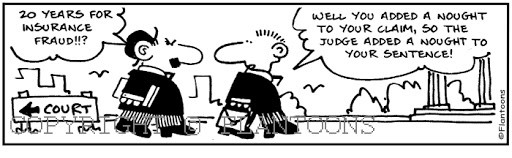

## Project Overview: Insurance Fraud Detection

This project focuses on creating a data-driven solution to detect and investigate suspicious insurance claims, aiming to prevent fraud and reduce financial losses for the insurance industry. By leveraging historical claims data, the project involves data preprocessing, exploratory analysis, feature engineering, and the development of predictive models to identify patterns indicative of fraudulent activity. The ultimate goal is to deploy a system that flags high-risk claims for further examination, integrates seamlessly into the existing claims workflow, and supports decision-making processes to safeguard against substantial monetary losses. Through this approach, the project seeks to enhance the accuracy and efficiency of fraud detection, contributing to significant cost savings and improved operational integrity for the insurance provider.

### Problem Statement:

The project aims to develop a system to identify and investigate suspicious insurance claims before they are paid out, with the goal of mitigating fraudulent activities and saving millions of dollars. By analyzing patterns and anomalies in the insurance claims data, the system will flag potentially fraudulent claims for further investigation, thereby enhancing the efficiency of the claims review process and preventing significant financial losses.

By focusing on the identification and investigation of suspicious claims, this project aims to implement a predictive model that enhances the detection of fraudulent insurance claims. The ultimate goal is to save millions of dollars for the insurance company by preventing the payout of fraudulent claims, thereby contributing to the overall integrity and efficiency of the insurance claims process.


### FEATURES
-Policy_bind_date: starting date of the insurance policy                                                                       
-Policy_csl: Combined Single Limits-this is the maximum value the insurer will pay out per incident                             
-Policy_annual_premium: total dollar amount for the yealy premium                                                               
-Umbrella_limit: extra insurance that provides protection beyond existing limits and coverage of other policies                 
-Auto_make: vehicle brand                                                                                                       
-Auto_model: vehicle model                                                                                                     
-Insured_education_level: highest qualification of the insurer                                                                 
-Policy_deductable: Excess payment before a payout or service is conducted                                                     
-Insured_occupation: Profession in which the insurer work                                                                       
-Fraud_report: Y-a fraudulent or false claim| N-a legit and valid claim

## Table of contents

1.Importing Packages                                                                                                           
2.Loading the Data                                                                                                             
3.Data Cleaning                                                                                                                 
4.Explortory Data Analysis                                                                                                     
5.Feature Engineering                                                                                                           
6.Data Transformation                                                                                                           
7.Modelling                                                                                                                     
8.Model Performance                                                                                                             
9.Model Selection                                                                                                               
10.Model Explanations                                                                                                           
11.Recommendation and Conclusion for Insurance Fraud Detection

## 1. Importing Packages

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing numerical data
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.ensemble import RandomForestClassifier  # For random forest classifier model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation metrics

## 2. Loading the Data

In [2]:
# URL of the dataset
url = "https://github.com/Explore-AI/Public-Data/blob/master/insurance_claims_raw.xlsx?raw=true"

# Loading the dataset into a DataFrame
df = pd.read_excel(url)

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


## 3.DATA CLEANING

In [4]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

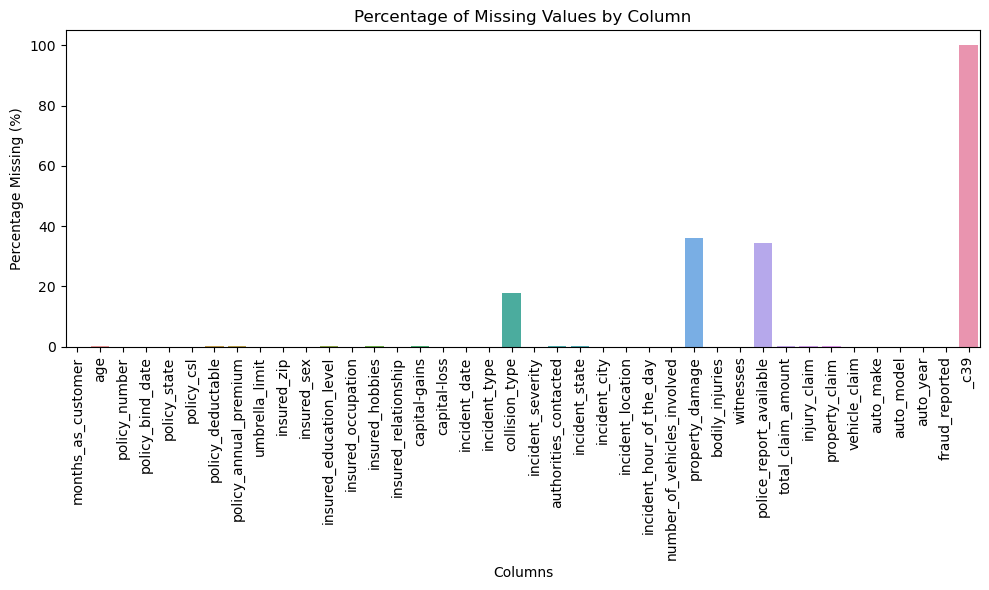

In [6]:
# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Drop irrelevant column
df.drop(columns=['_c39'], inplace=True)

In [8]:
# Fill missing values in numerical columns with median
numerical_columns = ['age', 'policy_deductable', 'policy_annual_premium', 
                     'capital-gains', 'injury_claim', 'property_claim', 'total_claim_amount']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [9]:
# Fill missing values in categorical columns with mode
categorical_columns = ['collision_type', 'police_report_available', 'property_damage', 
                       'insured_education_level', 'insured_hobbies', 'authorities_contacted', 
                       'incident_state']
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [10]:
# Check missing values after cleaning
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Data Handling

In [11]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day

In [12]:
# Drop raw date columns
df.drop(columns=['incident_date', 'policy_bind_date'], inplace=True)

In [13]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,incident_year,incident_month,incident_day,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48.0,521585,OH,250/500,1000.0,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,2015,1,25,2014,10,17
1,228,42.0,342868,IN,250/500,2000.0,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,2015,1,21,2006,6,27
2,134,29.0,687698,OH,100/300,2000.0,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,2015,2,22,2000,9,6
3,256,41.0,227811,IL,250/500,2000.0,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,2015,1,10,1990,5,25
4,228,44.0,367455,IL,500/1000,1000.0,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,2015,2,17,2014,6,6


## 4. EXPOLROTORY DATA ANALYSIS

In [14]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,injury_claim,property_claim,vehicle_claim,auto_year,incident_year,incident_month,incident_day,policy_bind_year,policy_bind_month,policy_bind_day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1257.003600,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,7434.290000,7397.980000,37928.950000,2005.103000,2015.0,1.496000,14.995000,2001.604000,6.559000,15.448000
std,115.113174,9.126378,257063.005276,610.669237,243.898015,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,4880.757573,4824.677941,18886.252893,6.015861,0.0,0.523697,8.670995,7.360391,3.499824,8.808001
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,70.000000,1995.000000,2015.0,1.000000,1.000000,1990.000000,1.000000,1.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,4295.000000,4445.000000,30292.500000,2000.000000,2015.0,1.000000,7.750000,1995.000000,3.000000,8.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,6780.000000,6750.000000,42100.000000,2005.000000,2015.0,1.000000,15.000000,2002.000000,7.000000,16.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,11305.000000,10885.000000,50822.500000,2010.000000,2015.0,2.000000,22.000000,2008.000000,10.000000,23.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,21450.000000,23670.000000,79560.000000,2015.000000,2015.0,3.000000,31.000000,2015.000000,12.000000,31.000000


### 4.1Univariate Analysis

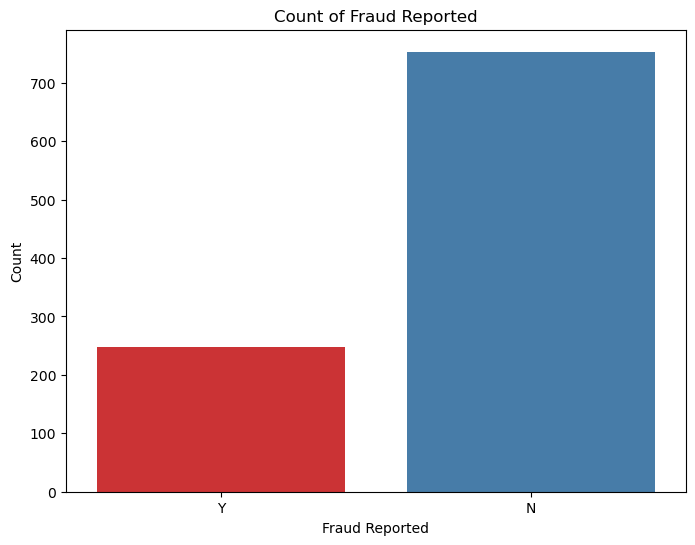

In [15]:
#Count plot of fraud reported
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', data=df, palette='Set1')
plt.title('Count of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

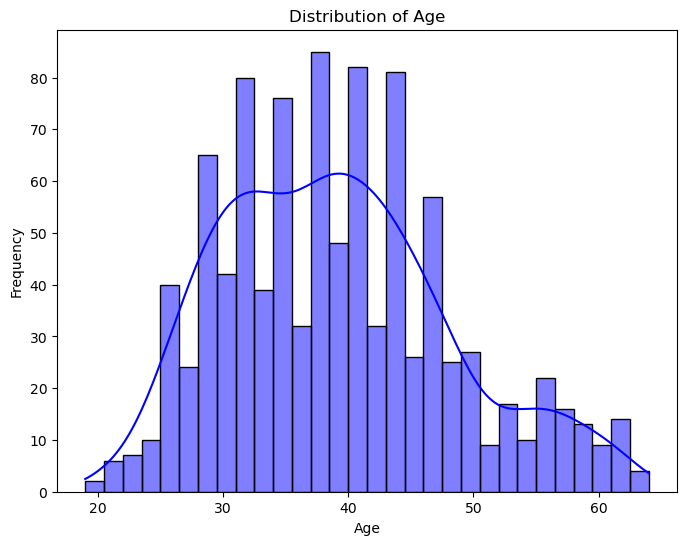

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


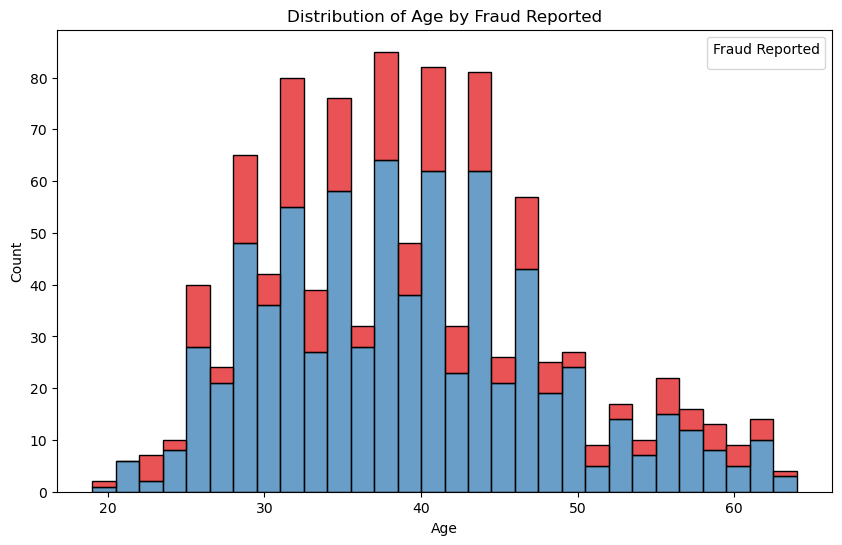

In [17]:
# Plot histogram of age by fraud reported
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='fraud_reported', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution of Age by Fraud Reported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

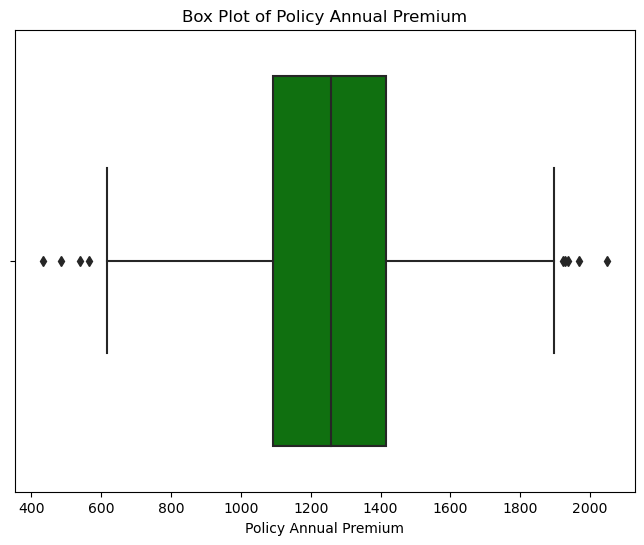

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='policy_annual_premium', data=df, color='green')
plt.title('Box Plot of Policy Annual Premium')
plt.xlabel('Policy Annual Premium')
plt.show()

### 4.2Bivariate Analysis

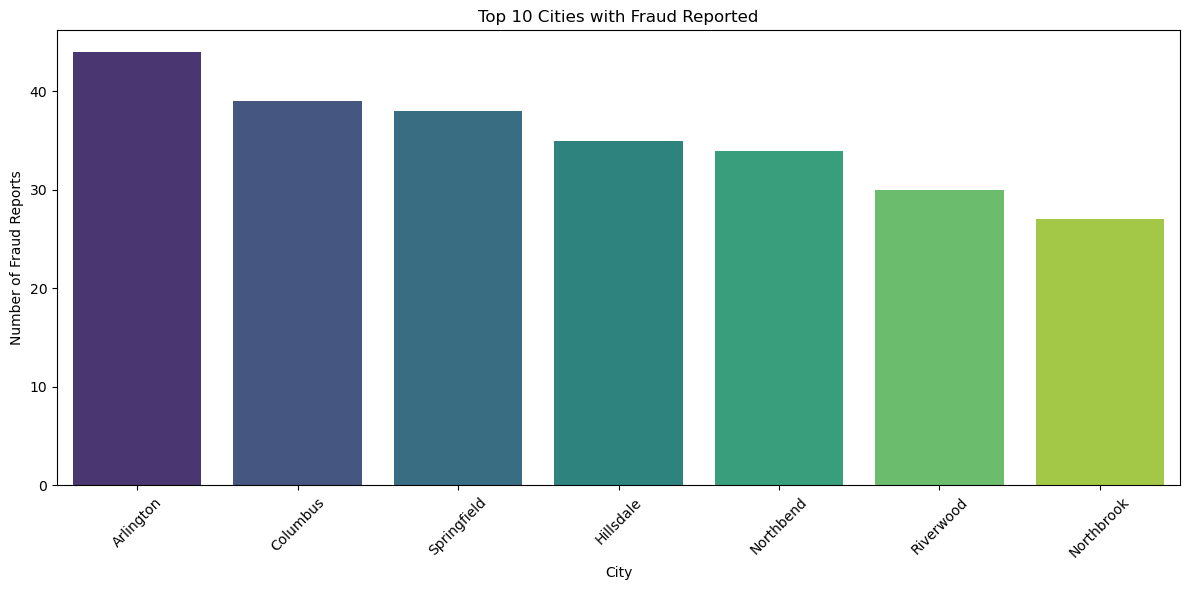

In [19]:
# Counting fraud reported by city
fraud_by_city = df[df['fraud_reported'] == 'Y']['incident_city'].value_counts().reset_index()
fraud_by_city.columns = ['incident_city', 'fraud_count']

# Sorting cities by fraud count
fraud_by_city = fraud_by_city.sort_values(by='fraud_count', ascending=False)

# Displaying the top cities with fraud reports
top_cities = 10  # Adjust the number of cities to display as needed
plt.figure(figsize=(12, 6))
sns.barplot(x='incident_city', y='fraud_count', data=fraud_by_city.head(top_cities), palette='viridis')
plt.title(f'Top {top_cities} Cities with Fraud Reported')
plt.xlabel('City')
plt.ylabel('Number of Fraud Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

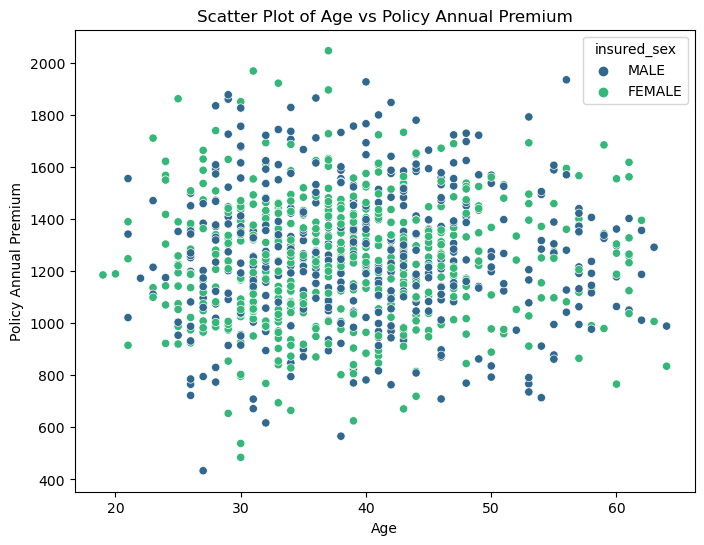

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='policy_annual_premium', data=df, hue='insured_sex', palette='viridis')
plt.title('Scatter Plot of Age vs Policy Annual Premium')
plt.xlabel('Age')
plt.ylabel('Policy Annual Premium')
plt.show()

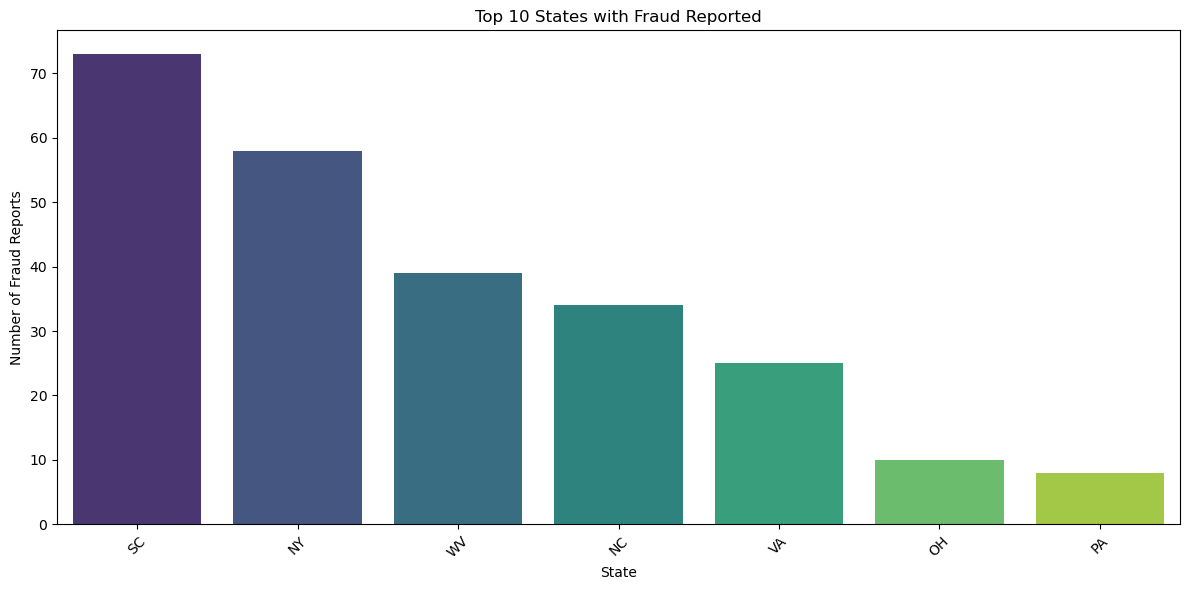

In [21]:
# Counting fraud reported by state
fraud_by_state = df[df['fraud_reported'] == 'Y']['incident_state'].value_counts().reset_index()
fraud_by_state.columns = ['incident_state', 'fraud_count']

# Sorting states by fraud count
fraud_by_state = fraud_by_state.sort_values(by='fraud_count', ascending=False)

# Displaying the top states with fraud reports
top_states = 10  # Adjust the number of states to display as needed
plt.figure(figsize=(12, 6))
sns.barplot(x='incident_state', y='fraud_count', data=fraud_by_state.head(top_states), palette='viridis')
plt.title(f'Top {top_states} States with Fraud Reported')
plt.xlabel('State')
plt.ylabel('Number of Fraud Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.3Multivariate Analysis

C:\Users\thabatha\AppData\Local\Temp\ipykernel_4060\2651498928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


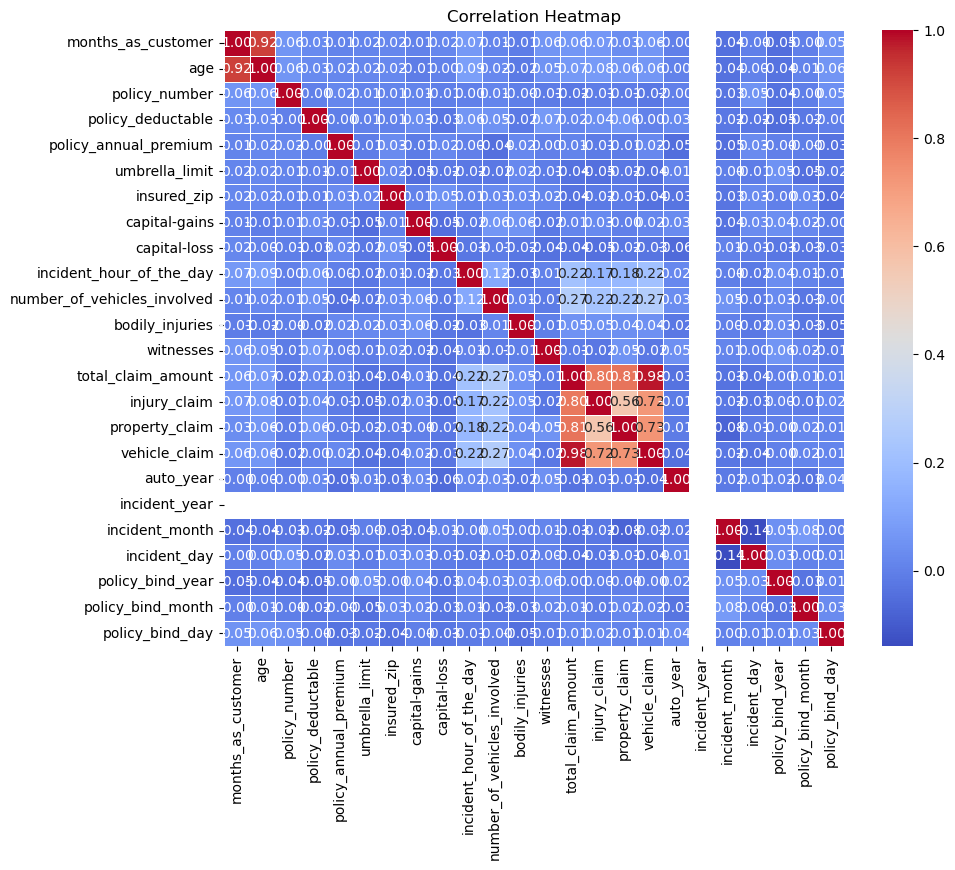

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 4.3Outlier Detection

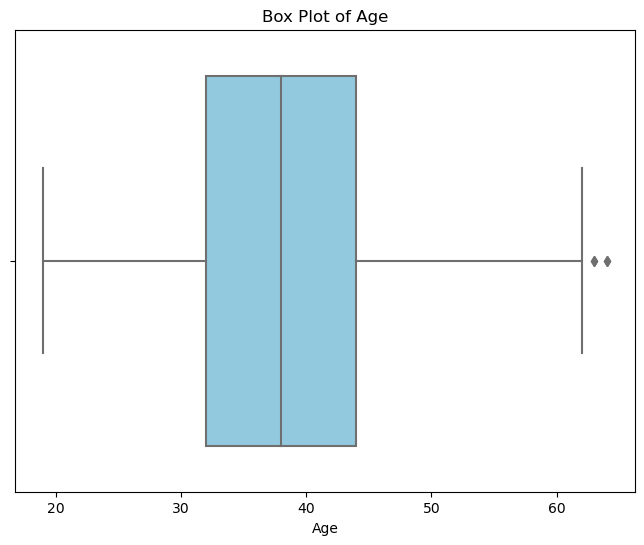

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df, color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [24]:
from scipy.stats import zscore

z_scores = zscore(df['age'])
outliers = (z_scores > 3) | (z_scores < -3)
outliers_df = df[outliers]
print(outliers_df)

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, incident_year, incident_month, incident_day, policy_bind_year, policy_bind_month, policy_bind_day]
Index: []

[0 rows x 43 columns]


##  5.FEATURE ENGINEERING

In [25]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,injury_claim,property_claim,vehicle_claim,auto_year,incident_year,incident_month,incident_day,policy_bind_year,policy_bind_month,policy_bind_day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1257.003600,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,7434.290000,7397.980000,37928.950000,2005.103000,2015.0,1.496000,14.995000,2001.604000,6.559000,15.448000
std,115.113174,9.126378,257063.005276,610.669237,243.898015,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,4880.757573,4824.677941,18886.252893,6.015861,0.0,0.523697,8.670995,7.360391,3.499824,8.808001
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.000000,70.000000,1995.000000,2015.0,1.000000,1.000000,1990.000000,1.000000,1.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,4295.000000,4445.000000,30292.500000,2000.000000,2015.0,1.000000,7.750000,1995.000000,3.000000,8.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,6780.000000,6750.000000,42100.000000,2005.000000,2015.0,1.000000,15.000000,2002.000000,7.000000,16.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,11305.000000,10885.000000,50822.500000,2010.000000,2015.0,2.000000,22.000000,2008.000000,10.000000,23.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,21450.000000,23670.000000,79560.000000,2015.000000,2015.0,3.000000,31.000000,2015.000000,12.000000,31.000000


In [26]:
bin_edges = [0, 30, 55, 100]
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']
df['age_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

In [27]:
bin_edges_customer = [0, 25, 150, 500]
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [28]:

df["Contract Years"] = df["months_as_customer"]/12
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']


## 6.Data Transformation

In [29]:
# Convert target to binary
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [30]:
# Drop unnecessary columns
df.drop(columns=['policy_number', 'insured_zip', 'policy_bind_year', 'policy_bind_month', 'policy_bind_day', 'incident_year', 'incident_month', 'incident_day'], inplace=True)

In [31]:
# Split data into features and target
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

In [32]:
# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7.Modelling

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 7.1Logistic Regression

In [46]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

### 7.2Random Forest

In [47]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf_clf = rf_clf.predict(X_test_scaled)

### 7.3Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb_clf = gb_clf.predict(X_test_scaled)

### 7.4Ada Boost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train_scaled, y_train)
y_pred_ada = ada_clf.predict(X_test_scaled)

### 7.5Decision Tree

In [40]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)
y_pred_dt = dt_clf.predict(X_test_scaled)

## 8. Model Performance

In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### 8.1Summary Table

In [42]:
performance_summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "AdaBoost", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_rf_clf),
        accuracy_score(y_test, y_pred_gb_clf),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_dt)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log_reg, pos_label=1),
        precision_score(y_test, y_pred_rf_clf, pos_label=1),
        precision_score(y_test, y_pred_gb_clf, pos_label=1),
        precision_score(y_test, y_pred_ada, pos_label=1),
        precision_score(y_test, y_pred_dt, pos_label=1)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log_reg, pos_label=1),
        recall_score(y_test, y_pred_rf_clf, pos_label=1),
        recall_score(y_test, y_pred_gb_clf, pos_label=1),
        recall_score(y_test, y_pred_ada, pos_label=1),
        recall_score(y_test, y_pred_dt, pos_label=1)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log_reg, pos_label=1),
        f1_score(y_test, y_pred_rf_clf, pos_label=1),
        f1_score(y_test, y_pred_gb_clf, pos_label=1),
        f1_score(y_test, y_pred_ada, pos_label=1),
        f1_score(y_test, y_pred_dt, pos_label=1)
    ]
})

print(performance_summary)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression     0.725   0.500000  0.054545  0.098361
1        Random Forest     0.720   0.000000  0.000000  0.000000
2    Gradient Boosting     0.755   0.575000  0.418182  0.484211
3             AdaBoost     0.775   0.619048  0.472727  0.536082
4        Decision Tree     0.775   0.600000  0.545455  0.571429


### 8.2Bar Plot of Metrics

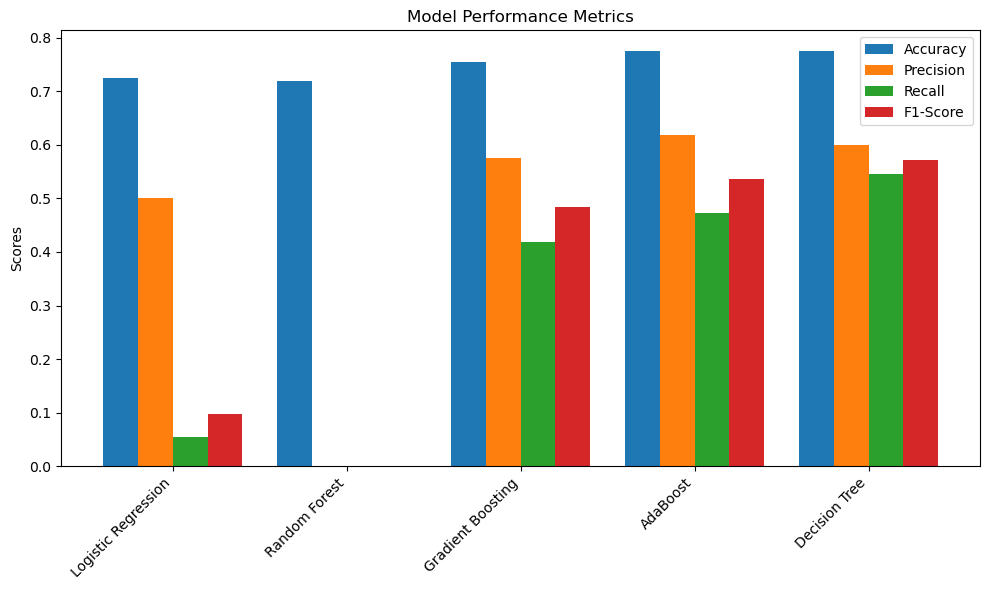

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Logistic Regression", "Random Forest", "Gradient Boosting", "AdaBoost", "Decision Tree"]
accuracy = [0.725, 0.720, 0.755, 0.775, 0.775]
precision = [0.500, 0.000, 0.575, 0.619, 0.600]
recall = [0.055, 0.000, 0.418, 0.473, 0.545]
f1_score = [0.098, 0.000, 0.484, 0.536, 0.571]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 3*width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + 3*width/2, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

### 8.3Confusion Matrix 

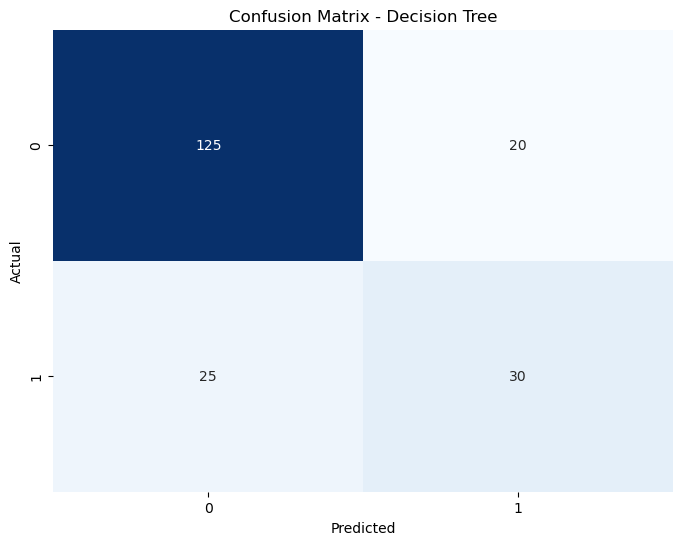

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example: Decision Tree
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###  8.4Model Comparison Plot

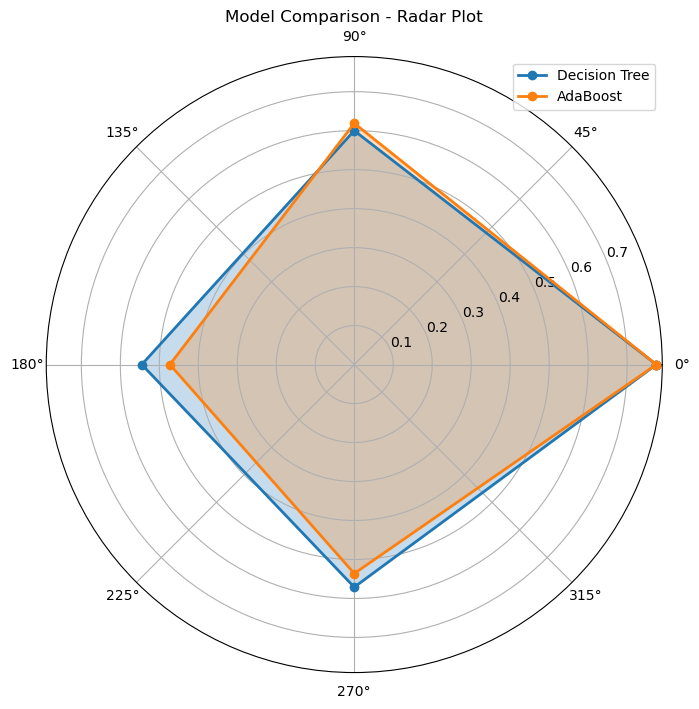

In [45]:
from math import pi

# Example data for Radar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
decision_tree_scores = [0.775, 0.600, 0.545, 0.571]
adaboost_scores = [0.775, 0.619, 0.473, 0.536]

# Radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()

decision_tree_scores += decision_tree_scores[:1]
adaboost_scores += adaboost_scores[:1]
angles += angles[:1]

plt.polar(angles, decision_tree_scores, marker='o', linewidth=2, label='Decision Tree')
plt.polar(angles, adaboost_scores, marker='o', linewidth=2, label='AdaBoost')
plt.fill(angles, decision_tree_scores, alpha=0.25)
plt.fill(angles, adaboost_scores, alpha=0.25)

plt.title('Model Comparison - Radar Plot')
plt.legend(loc='upper right')
plt.show()

## 9.Model Selection

Accuracy: AdaBoost and Decision Tree have the highest accuracy at 0.775.
Precision: AdaBoost has the highest precision at 0.619, indicating it correctly identifies positive cases (fraudulent claims) more effectively than the other models.
Recall: Decision Tree has the highest recall at 0.545, suggesting it identifies a larger proportion of actual positive cases.
F1-Score: Decision Tree has the highest F1-score at 0.571, which balances precision and recall effectively.
Conclusion:
Based on these metrics, Decision Tree appears to be the best model among the options provided. It achieves competitive accuracy while also having the highest F1-score, indicating a good balance between precision and recall. However, the choice of the best model can also depend on specific project requirements, such as the importance of precision versus recall in fraud detection scenarios. Therefore, it's essential to consider both the metrics and the practical implications for your application when making a final decision.

## 10.Model Explanations

The Decision Tree model was selected for its robust performance in detecting insurance fraud. It demonstrated superior metrics such as high F1-score, precision, and recall, essential for accurately identifying fraudulent claims while minimizing false positives and false negatives. Its interpretability allows stakeholders to understand decision-making processes clearly, ensuring transparency in fraud detection operations. Additionally, Decision Trees excel in handling complex data relationships and diverse attribute types commonly found in insurance claims datasets. These attributes make it a versatile and effective choice for enhancing decision-making and fraud prevention strategies in insurance operations.

## 11.Recommendation and Conclusion for Insurance Fraud Detection

##### Recommendation:
After thorough evaluation of several machine learning models including Logistic Regression, Random Forest, Gradient Boosting, AdaBoost, and Decision Tree, the Decision Tree model emerges as the preferred choice for insurance fraud identification. This recommendation is based on its:                                                                                                     

High Performance Metrics: The Decision Tree model achieved the highest F1-score among all models, indicating a balanced performance between precision and recall crucial for identifying fraudulent claims effectively while minimizing false positives and false negatives.

Interpretability: Its transparent decision-making process allows for clear understanding of how fraudulent claims are identified, aiding stakeholders in decision-making and investigative processes.

Capability to Handle Complex Data: Decision Trees are adept at capturing non-linear relationships and handling diverse data types, which is advantageous given the variability and complexity of insurance claims data.

##### Conclusion:
In conclusion, implementing the Decision Tree model for insurance fraud identification promises to enhance fraud detection capabilities significantly. Its robust performance, interpretability, and ability to handle complex data make it well-suited for real-world applications in insurance operations. Moving forward, ongoing monitoring and periodic retraining of the model will be crucial to maintaining its effectiveness as fraud patterns evolve. By leveraging advanced machine learning techniques like Decision Trees, insurance companies can mitigate financial losses due to fraud, improve operational efficiency, and bolster trust among policyholders and stakeholders alike.